In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

# Data Preprocessing

## 1. Standardize numerical features (Z-standardization)


In [2]:
train = pd.read_pickle("data/train.pkl")

In [3]:
train["tenure"]

0       33
1       49
2       56
3       66
4        1
        ..
5629    31
5630    60
5631    18
5632     1
5633    63
Name: tenure, Length: 5634, dtype: int64

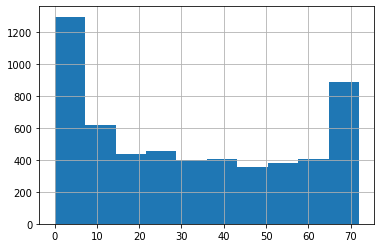

In [4]:
train["tenure"].hist();

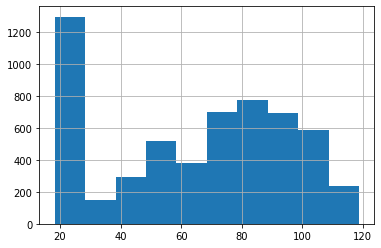

In [5]:
train["MonthlyCharges"].hist()

In [6]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

In [8]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
scaled_fitted = std.fit(train[num_cols])

In [9]:
scaled = pd.DataFrame(scaled_fitted.transform(train[num_cols]), columns=num_cols)

In [10]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,0.029040,0.532130,0.175307
1,0.680546,1.122466,1.164956
2,0.965580,1.355274,1.566211
3,1.372771,-1.484988,-0.439662
4,-1.273973,-0.666833,-0.982447
...,...,...,...
5629,-0.052399,-1.470022,-0.732208
5630,1.128456,1.024354,1.573990
5631,-0.581747,1.220578,-0.206710
5632,-1.273973,0.887995,-0.961725


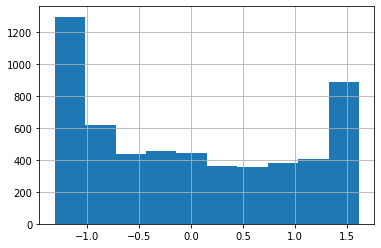

In [11]:
scaled["tenure"].hist()

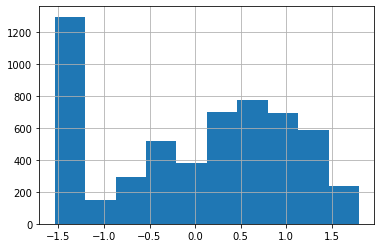

In [12]:
scaled["MonthlyCharges"].hist()

In [13]:
train[num_cols] = scaled

In [14]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9369-XFEHK,Female,1,Yes,No,0.029040,Yes,1,Fiber optic,0,1,0,0,0,0,Month-to-month,Yes,Bank transfer (automatic),0.532130,0.175307,Yes
1,3545-CNWRG,Female,0,Yes,Yes,0.680546,Yes,1,Fiber optic,0,1,0,0,1,1,Month-to-month,Yes,Electronic check,1.122466,1.164956,No
2,0899-WZRSD,Male,0,No,No,0.965580,Yes,1,Fiber optic,1,0,0,1,1,1,Month-to-month,Yes,Mailed check,1.355274,1.566211,No
3,1764-VUUMT,Male,0,No,Yes,1.372771,Yes,0,No,0,0,0,0,0,0,Two year,No,Credit card (automatic),-1.484988,-0.439662,No
4,2903-YYTBW,Male,0,Yes,Yes,-1.273973,Yes,0,DSL,0,0,0,0,0,0,Month-to-month,No,Electronic check,-0.666833,-0.982447,No


# 2. Handle categorical columns

In [15]:
train.nunique()

customerID          5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1495
TotalCharges        5282
Churn                  2
dtype: int64

In [16]:
cat_cols = ["InternetService", "Contract", "PaymentMethod"]

In [17]:
train["InternetService"].head()

0    Fiber optic
1    Fiber optic
2    Fiber optic
3             No
4            DSL
Name: InternetService, dtype: object

In [18]:
train = pd.get_dummies(data=train,
                       columns=cat_cols,
                       drop_first=True)

# 3. Convert bools to int

In [19]:
train.nunique()

customerID                               5634
gender                                      2
SeniorCitizen                               2
Partner                                     2
Dependents                                  2
tenure                                     73
PhoneService                                2
MultipleLines                               2
OnlineSecurity                              2
OnlineBackup                                2
DeviceProtection                            2
TechSupport                                 2
StreamingTV                                 2
StreamingMovies                             2
PaperlessBilling                            2
MonthlyCharges                           1495
TotalCharges                             5282
Churn                                       2
InternetService_Fiber optic                 2
InternetService_No                          2
Contract_One year                           2
Contract_Two year                 

In [20]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9369-XFEHK,Female,1,Yes,No,0.029040,Yes,1,0,1,0,0,0,0,Yes,0.532130,0.175307,Yes,1,0,0,0,0,0,0
1,3545-CNWRG,Female,0,Yes,Yes,0.680546,Yes,1,0,1,0,0,1,1,Yes,1.122466,1.164956,No,1,0,0,0,0,1,0
2,0899-WZRSD,Male,0,No,No,0.965580,Yes,1,1,0,0,1,1,1,Yes,1.355274,1.566211,No,1,0,0,0,0,0,1
3,1764-VUUMT,Male,0,No,Yes,1.372771,Yes,0,0,0,0,0,0,0,No,-1.484988,-0.439662,No,0,1,0,1,1,0,0
4,2903-YYTBW,Male,0,Yes,Yes,-1.273973,Yes,0,0,0,0,0,0,0,No,-0.666833,-0.982447,No,0,0,0,0,0,1,0


In [21]:
# first, handle the Yes/No columns
to_bool = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

In [22]:
train[to_bool] = np.where(train[to_bool] == "Yes", 1, 0)

In [23]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9369-XFEHK,Female,1,1,0,0.029040,1,1,0,1,0,0,0,0,1,0.532130,0.175307,1,1,0,0,0,0,0,0
1,3545-CNWRG,Female,0,1,1,0.680546,1,1,0,1,0,0,1,1,1,1.122466,1.164956,0,1,0,0,0,0,1,0
2,0899-WZRSD,Male,0,0,0,0.965580,1,1,1,0,0,1,1,1,1,1.355274,1.566211,0,1,0,0,0,0,0,1
3,1764-VUUMT,Male,0,0,1,1.372771,1,0,0,0,0,0,0,0,0,-1.484988,-0.439662,0,0,1,0,1,1,0,0
4,2903-YYTBW,Male,0,1,1,-1.273973,1,0,0,0,0,0,0,0,0,-0.666833,-0.982447,0,0,0,0,0,0,1,0


In [24]:
train = pd.get_dummies(train,
                       columns=["gender"],
                       drop_first=True)

# 4. Create a preprocessing function for the test set

In [25]:
def preprocess(df, trained_standardization_factors):
    df_copy = df.copy().reset_index(drop=True)
    
    # standardize numerical columns
    num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    df_copy[num_cols] = pd.DataFrame(trained_standardization_factors.transform(df_copy[num_cols]), columns=num_cols)
    
    # create dummies from categorical columns
    cat_cols = ["InternetService", "Contract", "PaymentMethod"]
    df_copy = pd.get_dummies(data=df_copy,
                             columns=cat_cols,
                             drop_first=True)
    
    # convert bools to int
    to_bool = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
    df_copy[to_bool] = np.where(df_copy[to_bool] == "Yes", 1, 0)
    df_copy = pd.get_dummies(df_copy,
                             columns=["gender"],
                             drop_first=True)
    
    return df_copy

In [26]:
train_1 = pd.read_pickle("data/train.pkl")

In [27]:
preprocess(train_1, scaled_fitted)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,9369-XFEHK,1,1,0,0.029040,1,1,0,1,0,0,0,0,1,0.532130,0.175307,1,1,0,0,0,0,0,0,0
1,3545-CNWRG,0,1,1,0.680546,1,1,0,1,0,0,1,1,1,1.122466,1.164956,0,1,0,0,0,0,1,0,0
2,0899-WZRSD,0,0,0,0.965580,1,1,1,0,0,1,1,1,1,1.355274,1.566211,0,1,0,0,0,0,0,1,1
3,1764-VUUMT,0,0,1,1.372771,1,0,0,0,0,0,0,0,0,-1.484988,-0.439662,0,0,1,0,1,1,0,0,1
4,2903-YYTBW,0,1,1,-1.273973,1,0,0,0,0,0,0,0,0,-0.666833,-0.982447,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6265-FRMTQ,0,0,0,-0.052399,1,0,0,0,0,0,0,0,0,-1.470022,-0.732208,0,0,1,0,1,0,0,0,1
5630,4742-DRORA,0,1,1,1.128456,1,1,1,0,1,0,1,0,1,1.024354,1.573990,0,1,0,1,0,0,0,0,1
5631,6693-FRIRW,0,0,0,-0.581747,1,0,0,1,1,0,1,1,0,1.220578,-0.206710,0,1,0,0,0,1,0,0,1
5632,3988-RQIXO,1,0,0,-1.273973,1,0,0,0,0,0,1,1,1,0.887995,-0.961725,1,1,0,0,0,0,1,0,0


In [28]:
test = pd.read_pickle("data/test.pkl")

In [42]:
test = preprocess(test, scaled_fitted)

# 5. Train model

In [41]:
# categorize columns
customer_id = ["customerID"]
response = ["Churn"]
# num_cols
bool_cols = [col for col in train.columns if col not in customer_id + response + num_cols]

In [45]:
train_X = train[num_cols + bool_cols]
train_y = train[response].values.ravel()
test_X = test[num_cols + bool_cols]
test_y = test[response]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train model
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

# 6. Predict and test

In [47]:
pred = lr.predict(test_X)

In [49]:
test_X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,1.494928,0.754961,1.681944,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0
1,0.517669,1.458375,1.198422,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,1
2,0.639827,1.346960,1.251102,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,0
3,-0.011679,0.831455,0.284036,0,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,-0.663186,1.057612,-0.301323,1,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.133837,1.137432,0.242060,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,1
1405,0.110478,0.996084,0.489528,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1
1406,-0.907500,1.134106,-0.570798,0,0,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0
1407,0.639827,-1.484988,-0.586999,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0


In [50]:
test_y

,Churn
0,0
1,0
2,0
3,0
4,1
...,...
1404,0
1405,0
1406,1
1407,0


In [51]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [48]:
accuracy_score(test_y, pred)

0.8034066713981547

In [53]:
def validate_model(train_X, train_y, test_X, test_y):
    lr = LogisticRegression()
    lr.fit(train_X, train_y)
    pred = lr.predict(test_X)
    print(f"""This model achieved an accuracy score of: {round(accuracy_score(test_y, pred), 4)}""")

In [54]:
validate_model(train_X, train_y, test_X, test_y)

This model achieved an accuracy score of: 0.8034


Test a few different approaches

In [55]:
train_banana = pd.read_pickle("data/train_banana.pkl")
test_banana = pd.read_pickle("data/test_banana.pkl")

# fit StandardScaler
std_banana = StandardScaler()
scaled_fitted_banana = std_banana.fit(train_banana[num_cols])

# preprocess
train_banana = preprocess(train_banana, scaled_fitted_banana)
test_banana = preprocess(test_banana, scaled_fitted_banana)

# split datasets
train_banana_X = train_banana[num_cols + bool_cols]
train_banana_y = train_banana[response].values.ravel()
test_banana_X = test_banana[num_cols + bool_cols]
test_banana_y = test_banana[response]

# train and test
validate_model(train_banana_X, train_banana_y, test_banana_X, test_banana_y)

This model achieved an accuracy score of: 0.819


### Try different ML models

In [56]:
def validate_model(train_X, train_y, test_X, test_y, model):
    ml = model()
    ml.fit(train_X, train_y)
    pred = ml.predict(test_X)
    print(f"""This model achieved an accuracy score of: {round(accuracy_score(test_y, pred), 4)}""")

In [57]:
from sklearn.tree import DecisionTreeClassifier

validate_model(train_X, train_y, test_X, test_y, DecisionTreeClassifier)

This model achieved an accuracy score of: 0.7239


In [58]:
validate_model(train_banana_X, train_banana_y, test_banana_X, test_banana_y, DecisionTreeClassifier)

This model achieved an accuracy score of: 0.7211


In [59]:
from sklearn.ensemble import RandomForestClassifier

validate_model(train_X, train_y, test_X, test_y, RandomForestClassifier)

This model achieved an accuracy score of: 0.7899


In [60]:
validate_model(train_banana_X, train_banana_y, test_banana_X, test_banana_y, RandomForestClassifier)

This model achieved an accuracy score of: 0.8105


In [62]:
models = {"Logistic Regression": LogisticRegression,
          "Decision Tree": DecisionTreeClassifier,
          "Random Forest": RandomForestClassifier}

In [64]:
def validate_model(train_X, train_y, test_X, test_y, models):
    for name, model in models.items():
        ml = model()
        ml.fit(train_X, train_y)
        pred = ml.predict(test_X)
        print(f"""The {name} model achieved an accuracy score of: {round(accuracy_score(test_y, pred), 4)}""")
        print("------------------------------------------\n")

In [65]:
validate_model(train_X, train_y, test_X, test_y, models)

The Logistic Regression model achieved an accuracy score of: 0.8034
------------------------------------------

The Decision Tree model achieved an accuracy score of: 0.7126
------------------------------------------

The Random Forest model achieved an accuracy score of: 0.7942
------------------------------------------



### Try different feature sets

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5634 non-null   object 
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   float64
 5   PhoneService                           5634 non-null   int64  
 6   MultipleLines                          5634 non-null   int64  
 7   OnlineSecurity                         5634 non-null   int64  
 8   OnlineBackup                           5634 non-null   int64  
 9   DeviceProtection                       5634 non-null   int64  
 10  TechSupport                            5634 non-null   int64  
 11  Stre

Based on plausibility

In [70]:
feature_set = ["SeniorCitizen",
               "tenure",
               "InternetService_Fiber optic",
               "InternetService_No",
               "Contract_One year",
               "Contract_Two year",
               "TotalCharges"]

train_X1 = train[feature_set]
train_y1 = train[response].values.ravel()
test_X1 = test[feature_set]
test_y1 = test[response].values.ravel()

validate_model(train_X1, train_y1, test_X1, test_y1, models)

The Logistic Regression model achieved an accuracy score of: 0.7928
------------------------------------------

The Decision Tree model achieved an accuracy score of: 0.7211
------------------------------------------

The Random Forest model achieved an accuracy score of: 0.7573
------------------------------------------



In [72]:
train_X1.head()

,SeniorCitizen,tenure,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,TotalCharges
0,1,0.029040,1,0,0,0,0.175307
1,0,0.680546,1,0,0,0,1.164956
2,0,0.965580,1,0,0,0,1.566211
3,0,1.372771,0,1,0,1,-0.439662
4,0,-1.273973,0,0,0,0,-0.982447


### Look at correlated features

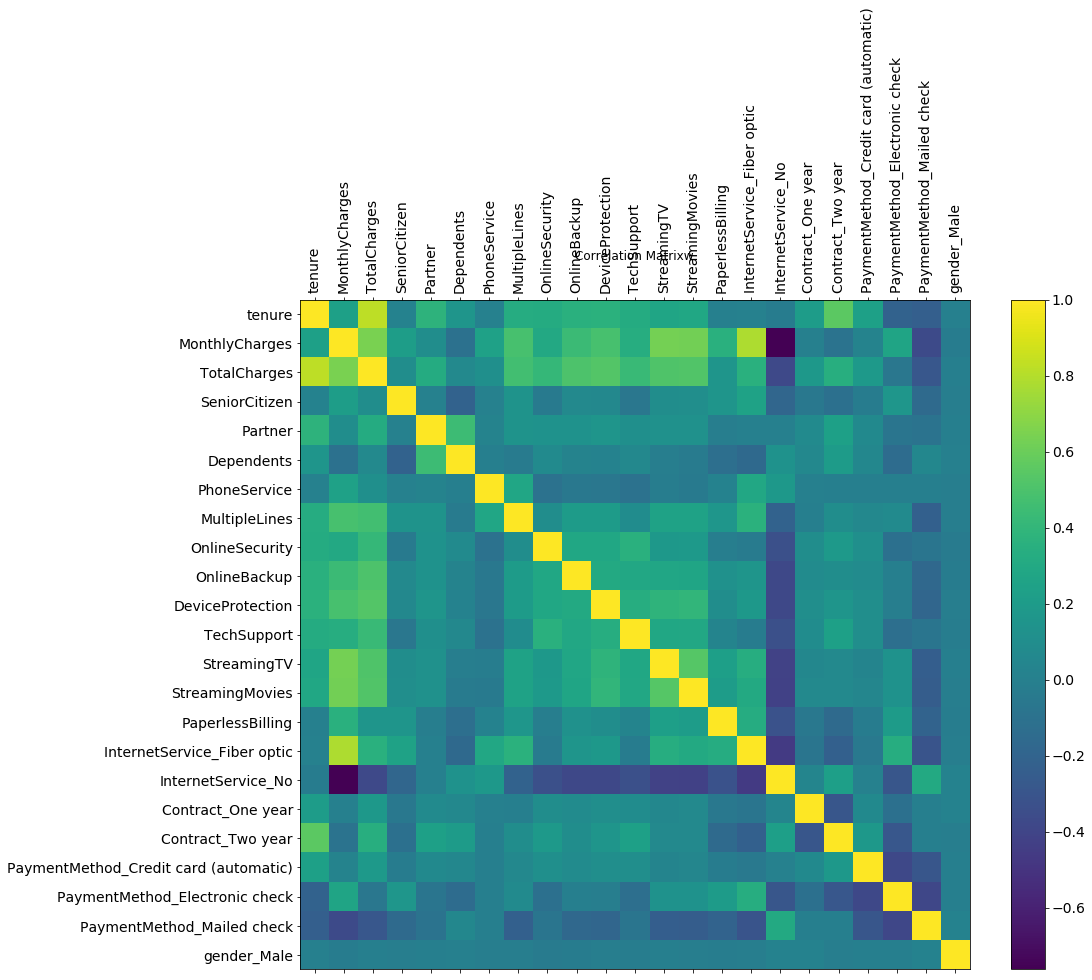

In [76]:
fig = plt.figure(figsize=(15,12));

plt.matshow(train_X.corr(), fignum=fig.number)
plt.xticks(range(train_X.shape[1]), train_X.columns, fontsize=14, rotation=90)
plt.yticks(range(train_X.shape[1]), train_X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrixw");

Create a new feature that counts the Internet services a customer has

In [84]:
services = ["OnlineSecurity",
            "OnlineBackup",
            "DeviceProtection",
            "TechSupport",
            "StreamingTV",
            "StreamingMovies"]

train[services].sum(axis=1)

0       1
1       3
2       4
3       0
4       0
       ..
5629    0
5630    3
5631    4
5632    2
5633    4
Length: 5634, dtype: int64

In [92]:
train = train.assign(no_of_services=train[services].sum(axis=1))
test = test.assign(no_of_services=test[services].sum(axis=1))

In [89]:
[col for col in num_cols + bool_cols if col not in services] + ["no_of_services"]

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'PaperlessBilling',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'gender_Male',
 'no_of_services']

In [93]:
train_X2 = train[[col for col in num_cols + bool_cols if col not in services] + ["no_of_services"]]
train_y2 = train[response].values.ravel()
test_X2 = test[[col for col in num_cols + bool_cols if col not in services] + ["no_of_services"]]
test_y2 = test[response].values.ravel()

validate_model(train_X2, train_y2, test_X2, test_y2, models)

The Logistic Regression model achieved an accuracy score of: 0.8027
------------------------------------------

The Decision Tree model achieved an accuracy score of: 0.7275
------------------------------------------

The Random Forest model achieved an accuracy score of: 0.7871
------------------------------------------

